<a href="https://colab.research.google.com/github/yoobyoungcheol/AIstudy24/blob/master/%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# 합성곱
#  입력데이터에 도장을 찍어서 유용한 특성만 드러나게 하는 것

# 전에 사용해 보았던 인공지능은 밀집층의 뉴런마다 입력개수만큼의 가중치가 있다.
# 즉 모든 입력에 가중치를 곱한다.
# 인공 신경망은 처음에 가중치를 절편과 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법을을 진행한다
# 손실이 낮아질 수록 최정의 가중치와 절편을 찾아간다.( 모델 훈련 )

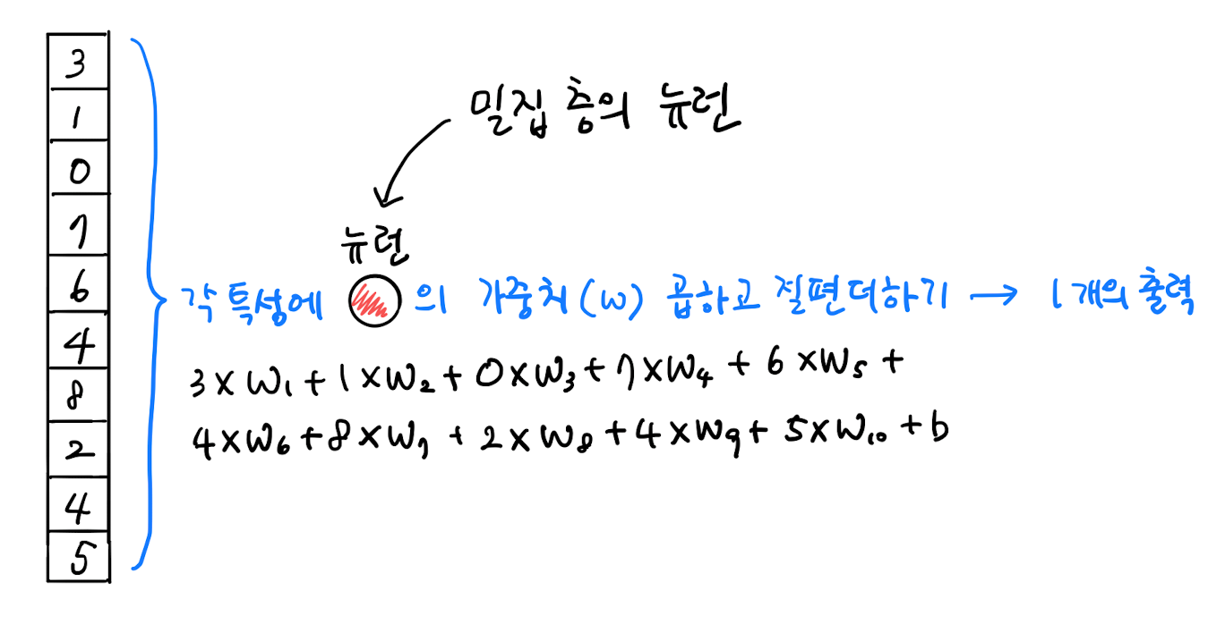

In [57]:
# 예를 들어 뉴런이 3개가 있다면 출력이 3개
# 입력 개수의 상관없이 동작을 진행한다
# 784개의 픽셀을 입력받는 은닉층의 뉴헌리 100개임으로 출려도 100개가 된다

In [58]:
# 합성곱은 밀집층의 계산이 조금 다르다
# 입력데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱한다.

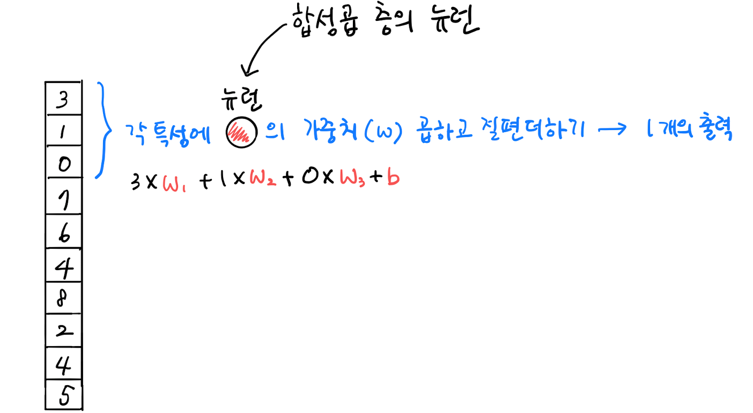

In [59]:
# 위에 3개를 묶어 처음 특성과 곱해져 1개의 출력을 만듬
# 다음 아래로 내려오면서 3개씩 묶어 특성과 곱해져서 새로운 출력을 만듬  (0~3) (1~4) (2~5)

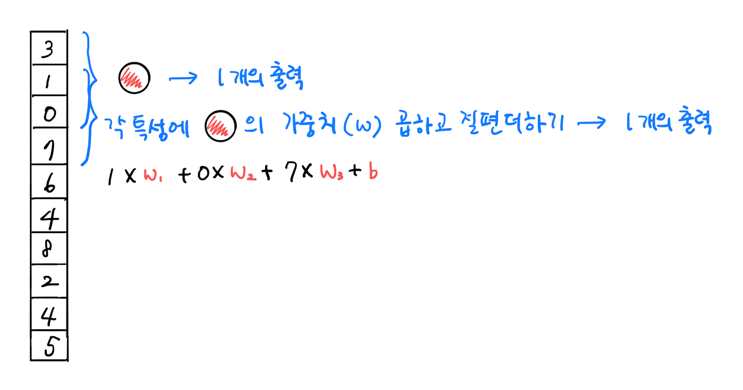

In [60]:
# 여기에 중요한 것은 첫번째 합성곱에 사용된 가중치와 두번째 합성곱에서 사용된 가중와 절편이 같다.
# 이렇게 한칸씩 아래로 이동하면서 출력을 만드는 것이 합성곱이라 한다

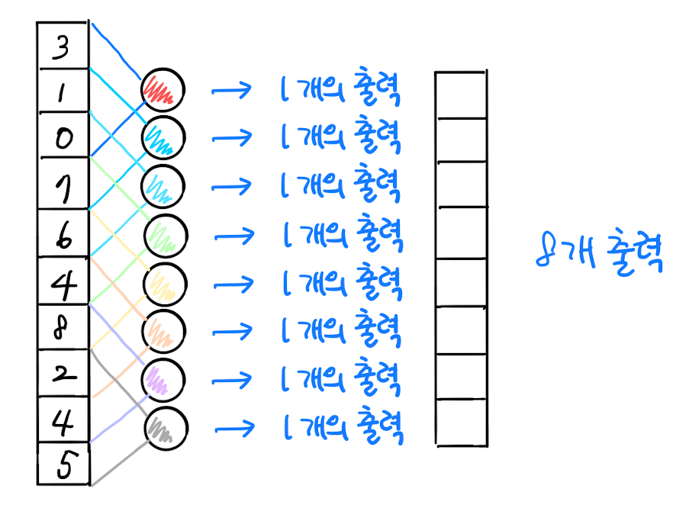

In [61]:
# 10개의 배열이 8개의 합성곱 출력으로 생성된다.

# 밀집층의 뉴런은 입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만듬
# 합성곱 층의 뉴런은 3개의 가중치를 가지고 8개의 출력을 만듬
# 합성곱 층의 뉴런에 있는 가중치 개수는 정하기 나름이다. (커스텀 - 하이퍼파라미터)
# 이 방법은 마치 도장을 찍는 방법처럼 생각하면 쉽다.

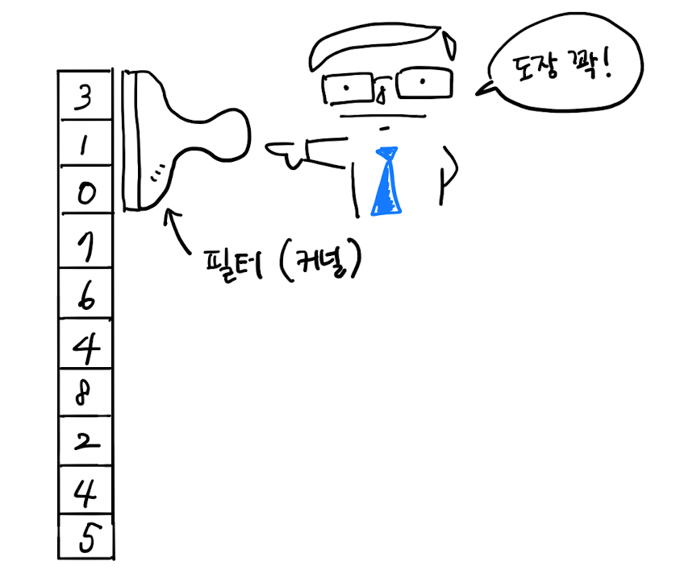

In [62]:
# 경사 하강법의 신경망 층은 뉴런이 길게 늘어서 있고 서로 조밀하게 연결되어 있었음

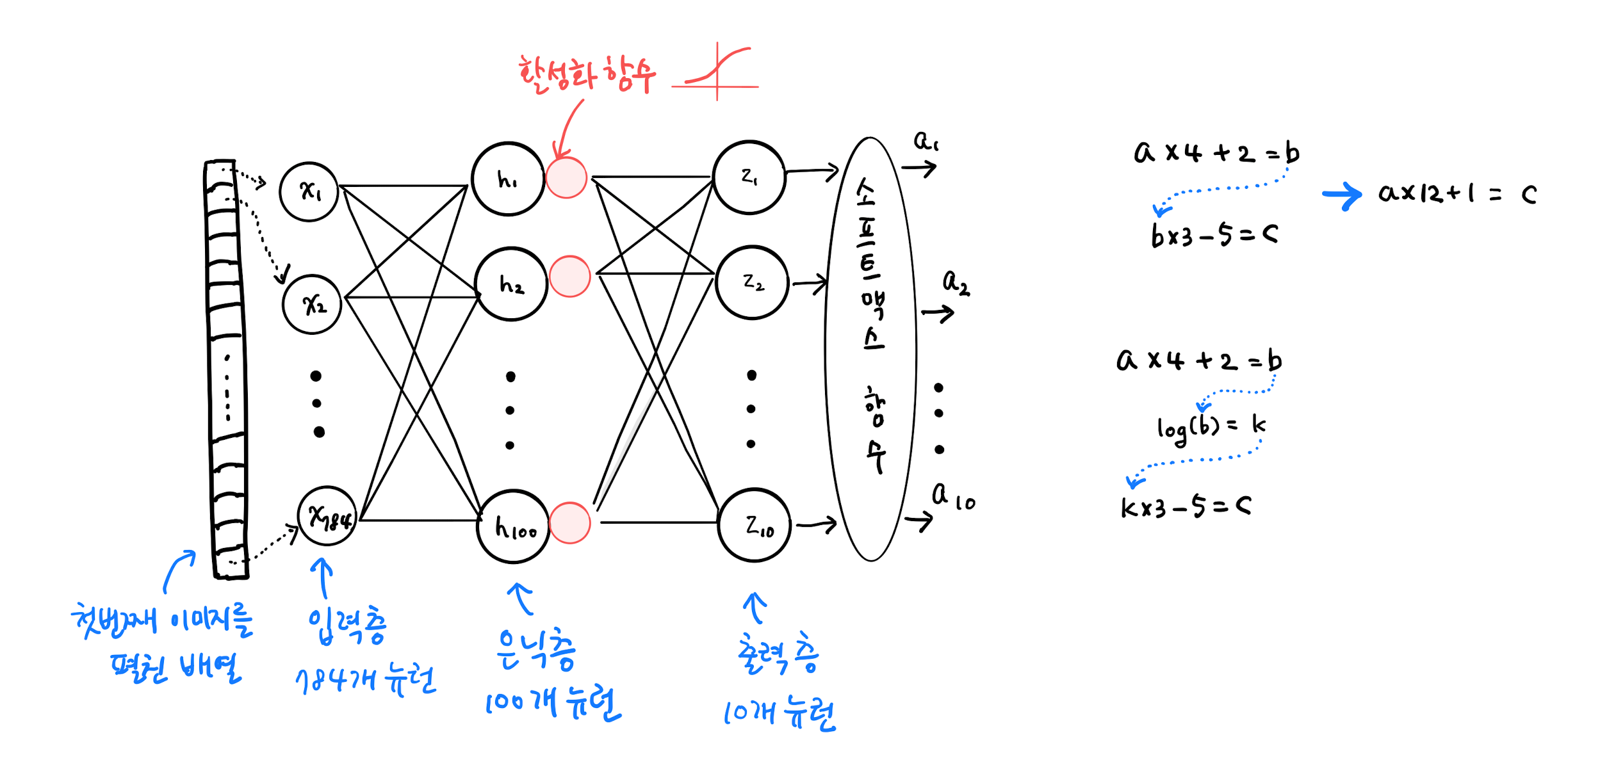

In [63]:
# 그런데 합성곱에서의 뉴런은 입력 위를 이동하면서 출력을 생성하기 때문에, 위 그림 처럼 표시가 힘들다.
# 이것을 뉴런이라고 칭하기에도 약간 애매하다 그래서 필터(커널)이라고 지칭 한다.
# 합성곱 신경망( Convolutional neeural  network  : CNN)
# https://kr.mathworks.com/discovery/convolutional-neural-network.html?gclid=Cj0KCQiA0MG5BhD1ARIsAEcZtwQYUQnRVLKQ8-WwcDHni0Fi-fO7gt9oWBJy6lyW4hk7TOBMM55mIdEaAu8bEALw_wcB&ef_id=Cj0KCQiA0MG5BhD1ARIsAEcZtwQYUQnRVLKQ8-WwcDHni0Fi-fO7gt9oWBJy6lyW4hk7TOBMM55mIdEaAu8bEALw_wcB:G:s&s_kwcid=AL!8664!3!650716963097!p!!g!!convolutional%20neural%20network&s_eid=psn_136154680972&q=convolutional+neural+network&gad_source=1

# 케라스 API와 이름을 맞추어 뉴런 개수를 이야기 할 때 필터( 뉴런 개수를 표현)
# 입력에 곱해지는 가중치를 의미할 때는 커널 이라고 함 (입력에 곱하는 가중치)

# 합성곱의 장점은 1차원이 아니라 2차원에도 적용가능하다

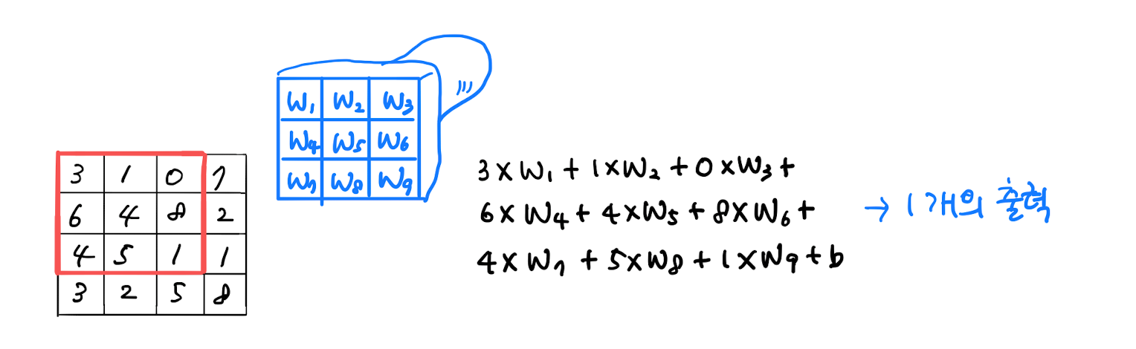

In [64]:
# 위 그림을 보면 입력이 2차원 배열이면 필터(도장)도 2차원 이어야한다
# 위 그림에서 이 필터의 커널 크기는 3*3(하이퍼파라미터) 으로 가정하고
# 윈쪽 위 모서리부터 합성곱을 시작
# 입력의 9개의 원소와 커널의 9개의 가중치를 곱한 후 절편을 더하고 1개의 출력을 만듬

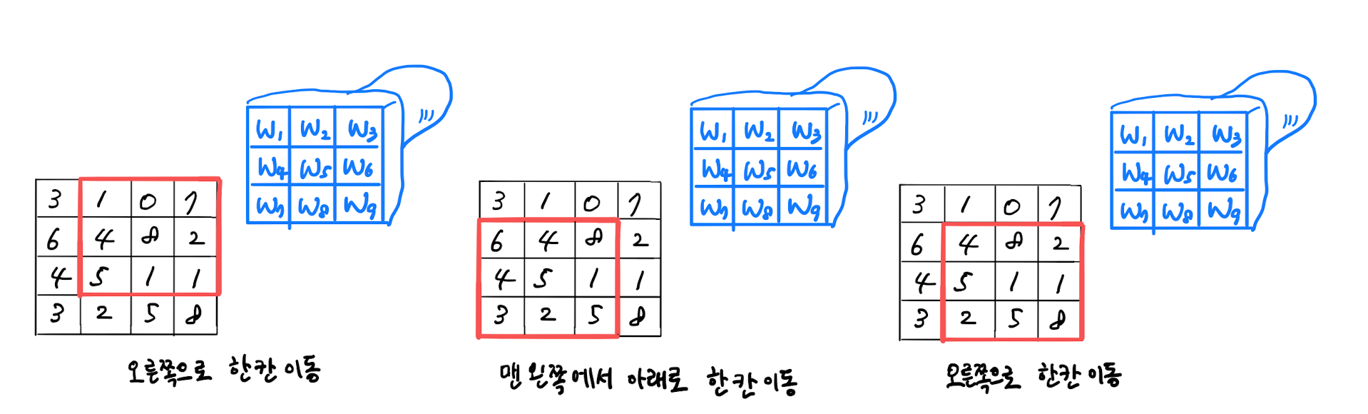

In [65]:
# Z 방향으로 합성곱을 수행
# 마치 고장을 찍듯이 계산하여 출력을 만듬
# 게산식은 밀집층과 크게 다르지 않다 -> 입력과 가중치의 행과 열을 맞추어 곱하고 모두 더함
# 총 4개의 출력을 만듬

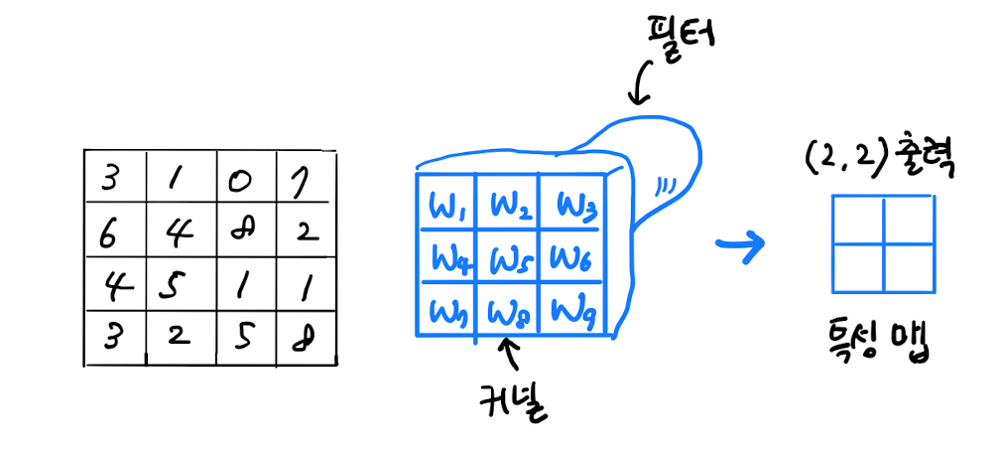

In [66]:
# 이때 4개의 출력을 필터가 입력에 높은 위치에 맞게 2차원으로 배치함
# 즉 윈쪽 위, 오른쪽위, 윈쪽아래, 오른쪽아래 모두 4개의 위치에 해당 값을 놓음
# 이렇게 2차원으로 표현하면 (4,4) 크기의 입력을 (2,2) 크기로 압축한 느낌이다
# 합성곱 계산을 통해 얻은 출력을 특성맵, 피처맵(deature)이라고 한다

# 밀집층에서 여러개의 뉴런을 사용하듯이 합성곱 층에서도
# 여러개 필터를 사용 하나만 사용 할 이유가 없다
# 여러개의 필터를 사용하면 만들어진 특성 맵은 순서대로 차곡차곡 쌓인다
# 3차원 배열 (2,2,3) 크기

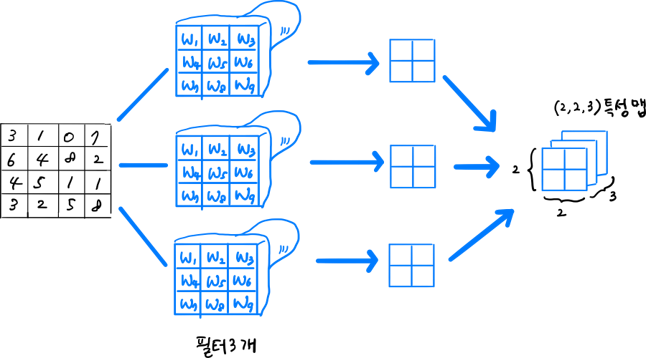

In [67]:
# 밀집층에 있는 뉴런의 가중치가 모두 다르듯이 합성곱층에 있는 필터의 가중치(커널)도 모두 다르다
# 같은 가중치를 가진 필터를 여러개 사용할 이유가 없다.

# 결론 : 실제 계산은 밀집층과 동일하게 단순히 입력과 가중치를 곱하는 것이지만
#          2차원 형태를 유지하는 점이 다르다

# 또 입력보다 훨씬 작은 크기의 커넣을 사용하고 입력 위를 윈쪽에서 오른쪽으로
# 위에서 아래로 이동하면서 2차원 특성 맵을 만든다

# 이렇게 2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이
# 이미지 처리 분야에서 뛰어난 성능을 발휘한다.

In [68]:
# 케라스 합성곱 층 테스트

# 케라스의 층은 모두 keras.layers 패키지 아래 클래스로 구현되어 있음 (합성곱 층도 마찬가지임)
# 특별히 입력 위 (윈쪽에서 오른쪽으로, 위에서 아래로) 이동하는 합성곱은 Conv2D 클래스로 제공함

from tensorflow import keras
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu')
#                  필터 (도장의 개수)
#                      커널 사이즈 (3*3)
#                                        활성화 함수 relu(렐루)

# 특성맵은 활성화 함수 적용 후에 사용함
# 완전 연결 신경망에서처럼 합성곱 신경망에서도 종종 활성화 함수를 언급하지 않음
# 일반적으로 특성 맵은 활성화 함수를 통과한 값을 나타냄
# 합성곱에서는 활성화 출력이란 표현을 잘 쓰지 않음

# 커넣의 크기는 하이퍼파라미터로 대부분 3*3이나  5*5크기가 권장됨
# 케라스 API의 합성곱 층은 Dense층을 사용했던 자리에 대신 Conv2D 층을 넣음

# 합성곱 신경망의 정의
# 일반적으로 1개이상의 합성곱 층을 쓴 인공신경망
# 즉, 합성곱 층만 사용한 신경망을 합성곱 신경망이라고 부르지 않음

<Conv2D name=conv2d_6, built=False>

In [69]:
# 패딩 : 바깥쪽 여백을 만듬

# 앞에 예를 들어 합성곱 계산은 (4,4) 크기의 입력에 (3,3) 크기의 커널을 적용하여
# (2,2) 크기의 특성맵을 만들었음

# 만약 커널크기는 (3,3)으로 그대로 두고 출력의 크기를 입력과 동일하게 (4,4)로 만들고 싶을 때
# 입력과 동일한 크기의 출력을 만들려면 마치 더 큰 입력에 합성곱인 척 해야 함
# 예를 들어 실제 입력크기는 (4,4)이지만 (6,6)처럼 다룬다고 가정해보자

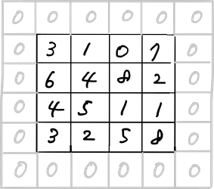

In [70]:
# 위 그림과 깅이 (6,6)크기 이면 (3,3) 크기의 합성곱을 했을 때 출력의 크기는 ?

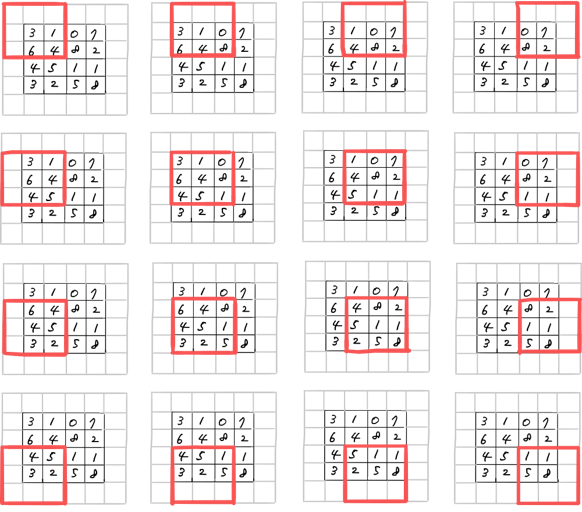

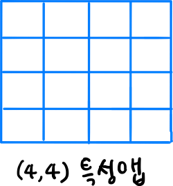

In [71]:
# (3,3) 커널로 도장을 찍으면 출력의 크기가 (4,4)가 되는 것이다
# 이렇게 배열의 주위를 가상의 원소로 채우는 것을 패딩이라고 한다(실제 값이 아니기 때문에 0으로 채움)
# 즉 (4,4) 크기의 입력에 0을 1개 패딩하면 (6,6) 크기의 입력이 된다
# 패딩의 역할은 순전히 커널이 도장을 찍을 횟수를 늘려주는 것이다
# 실제로 0값이 채워지지에 계산에 영향을 미치치 않음
# 이렇게 입력과 특성맵의 크기를 동일하게 만들어 주기 위해 입력 주뤼를 0으로 패딩하는 것을
#       세임 패딩(padding='same) 이라고 부른다(입력과 틍성맵의 크기를 동일하게 만듬)

# 벨리드 패딩 (padding='valid')  기본값
# 패딩없이 순수한 입력 배열에서만 합성곱을 하여 특성맵을 만듬
#   -> 특성 맵의 크기가 줄어들 수 밖에 없다

# 합성곱에서 패팅을 주로 사용하는 이유는 만약 패딩이 없다면
# 위에서 처럼 (4,4) 크기의 입력에 패팅없이 합성곱을 한다면
# 윈쪽위 모서리에 3은 커널 도장에 딱 한번 찍힘 (나머지 모서리도 마찬가지)

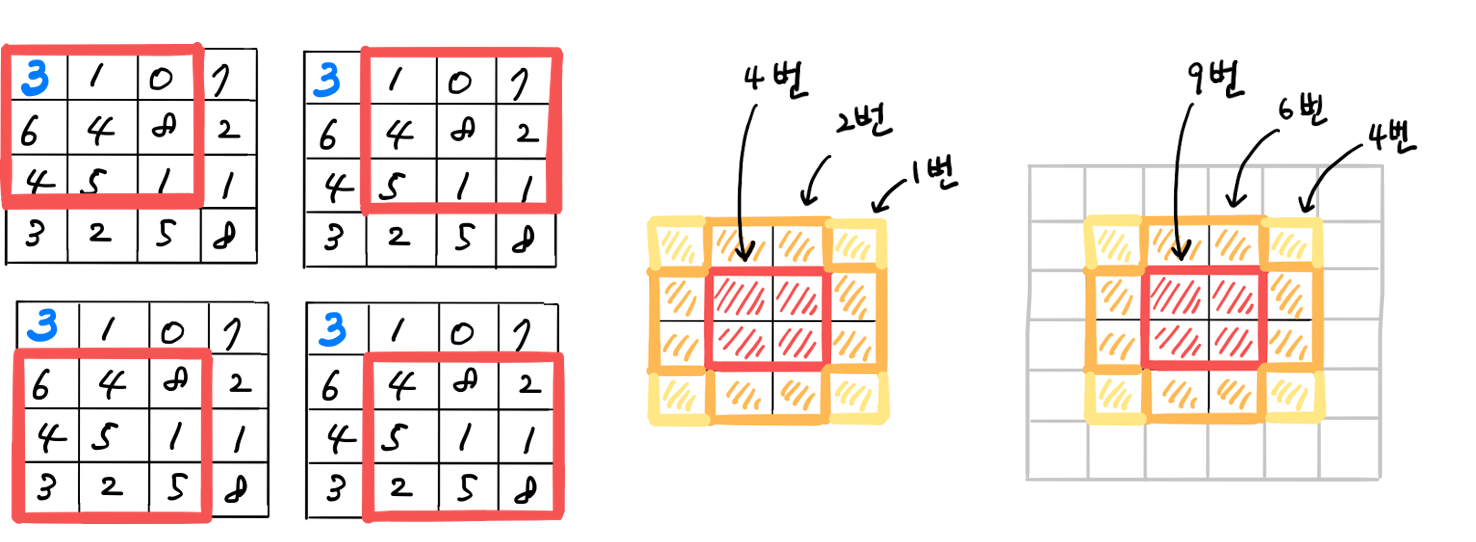

In [72]:
# 반면 다른 원소들은 2번 이상 커널과 계산을 수행한다
# 가운데 있는 4,8,5,1 값은 4번 계산됨 ( 가운데 값이 두드러짐 )
# 패딩을 하지 않을 경우 중앙부와 모서리 픽셀의 합성곱에 참여하는 비율은 크게 차이가 난다 ( 4 : 1 )
# 1픽셀을 패딩하면 ( 9 : 4 )
# 만약 2픽셀을 패딩하면 중앙부와 모서리 픽셀이 합성곱에 참여하면 ( 1 : 1 ) 동일 비율로 동일해진다.

In [73]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

<Conv2D name=conv2d_7, built=False>

In [74]:
# 스트라이드 (stride) : 합성곱 연산은 좌우, 위아래 한칸씩이 기본값이지만
# 두칸씩 이동할 수도 있는 방법(특성맵의 크기가 작아짐)
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same',strides=1)
#                                                                           strides=2 로 사용될 일은 아직은 거의 없다.

<Conv2D name=conv2d_8, built=False>

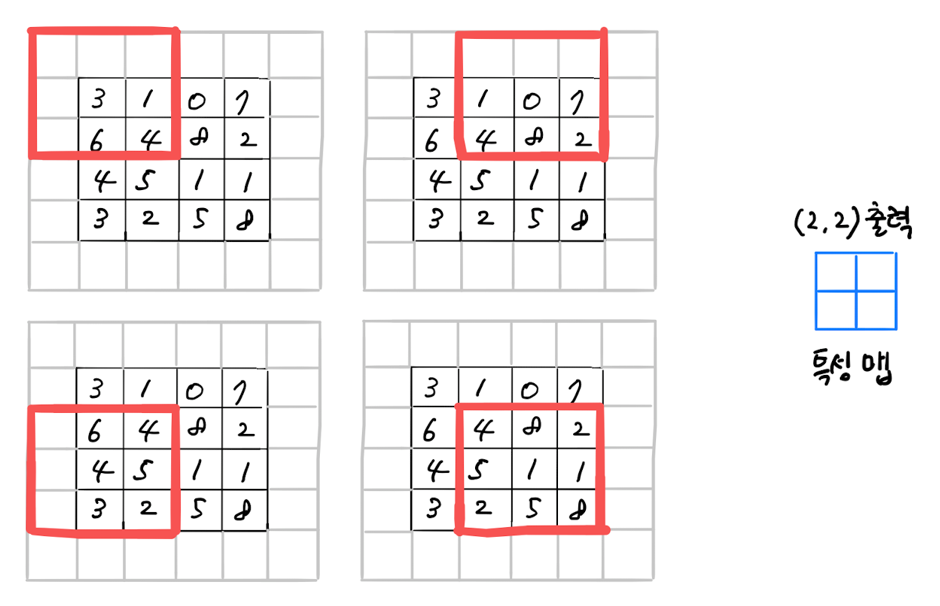

In [75]:
# 풀링(pooling) : 합성곱층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행
#       -> 하지만 특성맵의 개수는 줄이지 않음
# 풀링은 특성맵에 커널 없는 필터를 적용하는 것과 비슷하게 생각할 것

# 예를 들면 (2,2,3) 크기의 특성맵에 풀링을 적용하면
# 마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어들어 (1,1,3) 크기의 특성 맵이 됨

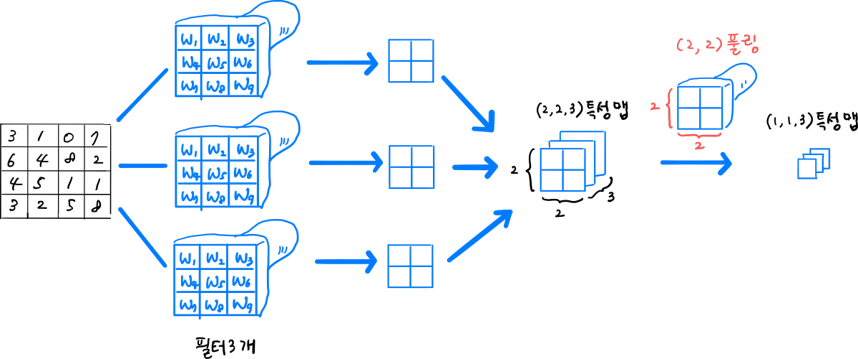

In [76]:
# 풀링도 합성곱처럼 입력 위를 지나가면서 도장을 찍는다 (위 그림은 (2,2) 크기로 풀링 함)
# 풀링에는 가중치가 없기 때문에 도장을 찍은 영역에서 가장 큰 값을 고르거나 (최대풀링) MaxPooling
#                                                                      평균(평균풀링)을 계산함  AveragePooling
# 풀링은 합성곱 층과 뚜렷이 구분 되기 때문에 풀링층 이라고 부름
# 예를 들어(4,4)크기의 특성맵이 있다고 가정해보자
# 여기에 (2,2) 최대(max) 풀링을 적용하면 절반으로 크기가 줄어든다.

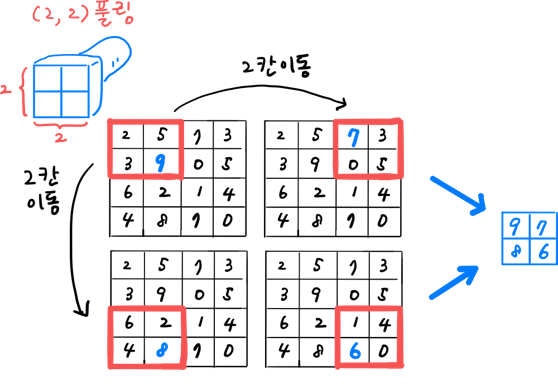

In [77]:
# 최ㅐ대 풀링은 가장 큰 값을 고르기 때문에 첫번째 9, 두번째 7 세번쨰8 네번째 6을 차례대로 골라 (2,2)출력을 만든다
# 특성맵이 여러개라면 동일한 작업을 반복함 (10개의 틍성맵이 있다면 풀링을 가한 트그성 맵도 10개)
# 풀링 영역이 두칸씩 이동을 함 -> 겹침없이 이동 (합성곱에서 커넣이 한칸씩 이동했기 때문에 겹치는 부분이 있었다)
# 풀링 크기가 (2,2)면 2칸씩 이동,  (3,3)이면 3칸씩 이동

# 풀링은 가중치가 없고 풀링 크기와 스트라이드가 같기 때문에 이해하기 쉽다 (패턴도 없다)
keras.layers.MaxPooling2D(2) # 대부분 풀링의 크기는 2 (가로 세로 크기를 절반으로 줄임)

<MaxPooling2D name=max_pooling2d_4, built=False>

In [78]:
# 합성곱 층과 마찬가지로 strides와 padding 매개변수를 제공함
# strides의 기본값은 자동으로 풀링의 크기이므로 따로 지정 하지 않음
# padding의 기본값은 valid로 패딩을 하지 않음

keras.layers.MaxPooling2D(2, strides=2, padding='same')  # 최대 풀링 코드

keras.layers.AveragePooling2D(2, strides=2, padding='valid')  # 평균 풀링 코드
# 대부분 최대 풀링을 많이 사용한다
# 평균 풀링은 특성맵에 있는 중요한 정보를 평균을 내어 희석시킬 수 있기 때문에

# keypoint : 풀링은 가로 세로 방향만 진행한다.( 특성맵의 개수는 변하지 않고 그대로)

<AveragePooling2D name=average_pooling2d_1, built=False>

In [79]:
# 합성곱 신경망의 전체 구조

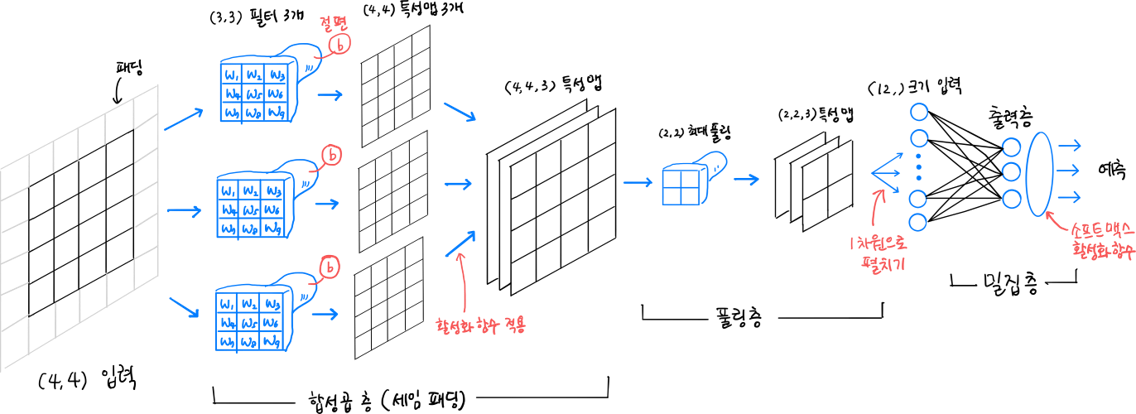

In [80]:
# 1. (4,4) 입력값에 패딩 1을 적용
# 2. 합성곱에서 사용할 커널의 크기는 (3,3)크기이고 세임 패딩이 1이므로 1픽셀이 입력 데이터 주변에 추가
# 3. 이때 패딩은 센터플로에서 자동으로 추가하므로 수동으로 입력에 어떤 작업을 추가할 필요가 없음
# 4. 패딩이 추가된 입력에서 합성곱이 수행되ㅐㅁ

# 5. 합성곱의 필터는 3개임 ( 각각 3,3크기의 가중치를 가지고 있으며 필터마다 정편이 하나씩 있음)
# 6. 밀집층의 뉴런과 마찬가지로 필터의 가중치는 각기 서로 다음, 합성곱의 스트라이드는 항상 1
# 7. 만들어지는 특성 맵의 크기는 입력과 동일한 (4,4),3개의 필터가 하나씩 합성곱의 출력을 만들고 이 출력이 합쳐져서 (4,4,3)크기의 특성맵 생성
# 8. 밀집층과 마찬가지로 합성곱 층에서도 활성화 함수를 적용함(합성곱의 활성화함수로 렐루사용)

# 9.풀링층은 합성곱층에서 만든 특성 맵의 가로세로 크기를 줄임
# 10. 보통 (2,2) 풀링을 사용해서 절반으로 줄임 ( 특성맵의 개수는 변하지 않음 (2,2,4))
# 10-1. 풀링을 사용하면 합성곱에서 스트라이드를 크게하여 특성맵을 줄이는 것보다
#        풀링층에서 크기를 줄이는 것이 더 나은 성능이다

# 11. 밀집층인 출력층에서 전달하지만 3차원 배열을 1차원 배열로 펼쳐햐함 (Flatten 클래스)
#       -> 12개의 원소를 가진 1차원 배열이고 출력층의 입력이 됨
# 12. 3개의 뉴런을 두었고 (3개의 클래스를 분류하는 다중분류)
#               -> 출력층에서 계산된 값은 소프트맥스 활성화 함수를 가짐  -> 최종 예측 확률이 됨

In [81]:
# 컬러이미지인 경우
# 컬러인 경우에는 RGB(빨,녹,파)채널로 구현되어 있음
# 하나의 컬러이미지는 너비와 높이 차원 이외에 길이 차원 ( 채널차원 )이 있다. (4,4,3)이 되는 것
# -> 마지막 3이 깊이

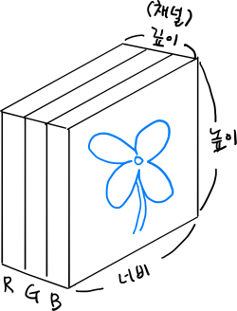

In [82]:
# 깊이가 있는 입력에서 합성곱을 수행하기 위해서는 도장도 깊이가 필요하다
# 즉 커널의 크기가 (3,3) 이 아니라 (3,3,3) 이됨

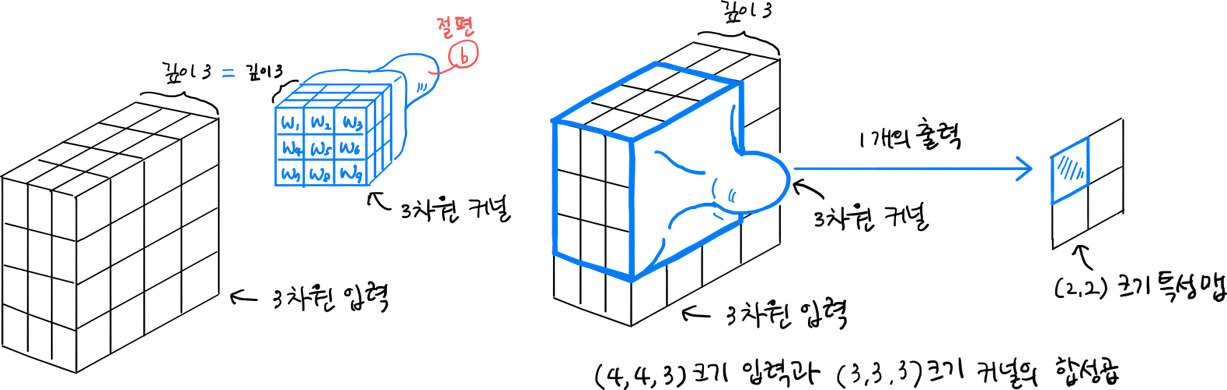

In [83]:
# 커널 배열의 깊이는 항상 입력의 깊이와 같다
# 합성곱의 계산은 (3,3,3) 영역에 해당하는 27개의 원소에 27개의 가중치를 곱하고 절편을 더하는 식
# 기본적으로 2차원 합성곱과 같지만 도장이 입력의 깊이만큼 쏙 들어간다고 생각해봄
# 결론은 입력이나 필터의 차원이 몇개인지 상관없이 항상 출력은 하나의 값(특성 맵에 있는 한 원소가 채워짐)

# 케사스의 합성곱 층은 원래 3차원 입력을 준비한다
# (우리가 흑백이미지인 MNIST를 예제로 사용해서 그렇지 원래는 모두 컬러)
# (28,28,1) 크기의 3차원 배열로 변환 (원소 개수는 동일하면서 차원만 맞춤)

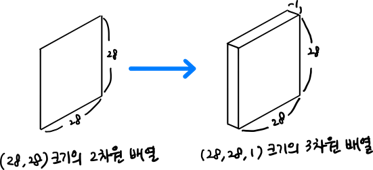

In [84]:
# 이와 비슷한 경우는 합성곱 층~풀링 층 다음에 다시 또 합성곱 층이 올때
# 첫번째 합성곱층의 필터 개수가 6개라고 가정하여 첫번째 풀링 층을 통과한 특성맵의 크기가 (4,4,5)라고 했을때
# 두번쨰 합성곱 층에서 필터의 너비와 높이가 각각 3이라면 이 필터의 커널 크기는 (3,3,5)가 된다
# 이유 : 입력의 길이와 필터의 깊이는 같아야 하기때문 ( 3*3*5 = 45개의 가중치를 곱하고 절편을 더함)
#           -> 합성곱의 결과는 1개의 출력

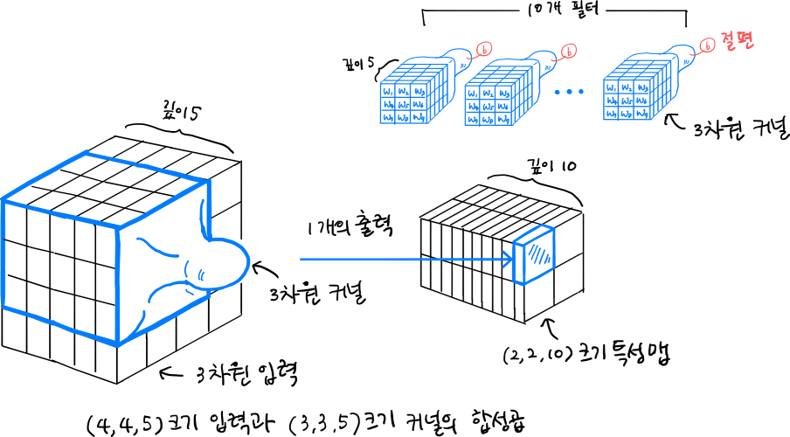

In [85]:
# 두번째 합성곱 층의 필터 개수가 10개라면 만들어진 특성맵의 크기는 (2,2,10)이 됨
# 이렇게 합성곱 신경망은 너비와 높이는 점점 줄어들고 깊이는 점점 깊어지는 것이 특징이다
# 마지막에 출력층 전에 특성맵을 모두 펼쳐서 밀집층의 입력으로 사용

# 합성곱 신경망에서 필터는 이미지에 있는 어떤 특정을 찾는다
# 처음에는 간단한 기본적인 특징(직선,곡선 등등)을 찾고 층이 깊어질 수록 다양하고 구체적인 특징을 감지할 수 있도록 필터의 개수를 늘림

# 또 이런 특징이 이미지의 어느 위치에 놓이더라도 쉽게 감지할 수 있도록 너비와 높이 차원을
# 점점 줄여가는 것이 합성곱 신경망의 목표이다

In [86]:
# 합성곱 신경망을 사용한 이미지 분류 실습

# 전에 배운 합성곱 필터 패팅 스트라이드 풀링 등은 직접 계산할 필요가 없다
# 케라스 API가 알아서 한다 그러니 개념과 돌아가는 기능에 대한 느낌을 알아야 최적의 결과를 얻을 수 있다.
# 그래서 동작원리를 터득하고 특히 다른 신경망 구조를 만나도 잘 적응할 수 있다.

# 패션 MNIST를 활용하여 응용해본다
# 전처리 : 데이터 스케일을 0~255 사이에서 0~1사이로 바꾸고 훈련 세트와 검증세트로 나눔
# 차이점은 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 했다
#       (넘파이 reshape(), Flatten 사용) 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 할 필요가 없다
#       입력 이미지는 항상 깊이(채널) 차원이 있어야 함

# 흑백 이미지의 경우 해널 차원이 없는 2차원 배열이지만 Conv2D층을 사용하기 위해 마지막에 이 채널 차원을 추가해야함
# 넘파이 reshape() 매서드를 이용해 전채 배열 차원을 그대로 유지하면서 마지막에 차원을 간단히 추가함

In [87]:
import tensorflow as tf
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다
tf.keras.utils.set_random_seed(42)

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()   # 패션 MNIST 자료 불러오기

train_scaled = train_input.reshape(-1,28,28,1)/255.0
# train_input(48000,28,28) -> train_scaled(48000,28,28,1) 로 4차원 배열로 변경

train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2, random_state=42)
# 훈련 데이터 검증데이터 훈련타깃 검증 타깃 -> 8:2

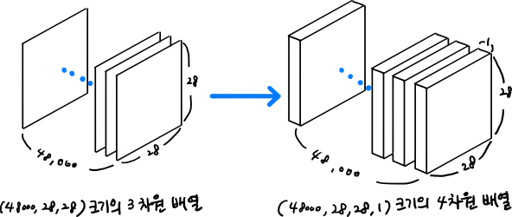

In [88]:
# 합성곱 신경망 만들기 : 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 따른 분류 확률을 계산함

model = keras.Sequential()  # Sequential ai 클래스의 객체를 만듬
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

#                      Conv2D 층을 add로 추가
#                             32 : 합성곱 층으로 32개의 필터를 사용
#                               kennel_size=3 커널의 크기는 (3,3)
#                                              activation='relu' 활성화 함수 relu 사용
#                                                                padding='same' 세임패딩 사용
#                                                                               input_shape=(28,28,1)  앞에 사용한 이미지를 차원변경함

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


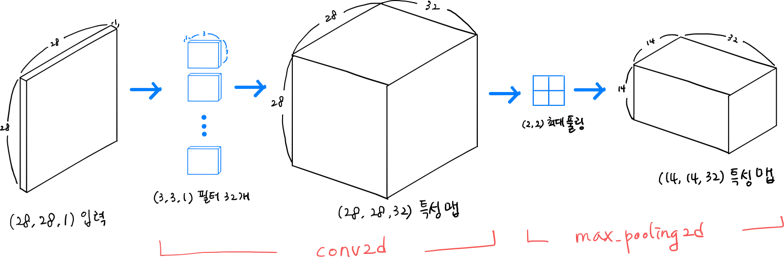

In [89]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.add(keras.layers.MaxPooling2D(2))
# 풀링 층 추가 (최대 풀링 (2:2)특성 맵의 크기는 절반으로 줄어듬)
# 합성곱 층에서 32개의 필터를 사용했기 떄문에 특성맵의 깊이는 32
# 최대풀링을 통과한 특성맵의 크기는 (14,14,32)

In [91]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
# 이번 합성곱 층은 세임 패딩을 사용 (입력의 가로 세로 크기를 줄이지 않음)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.add(keras.layers.MaxPooling2D(2))
# 이미지는 풀링 층에서 이 크기를 절반으로 줄임
# 64개의 필터를 사용했으니 특성맵의 크기는 (7,7,64)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

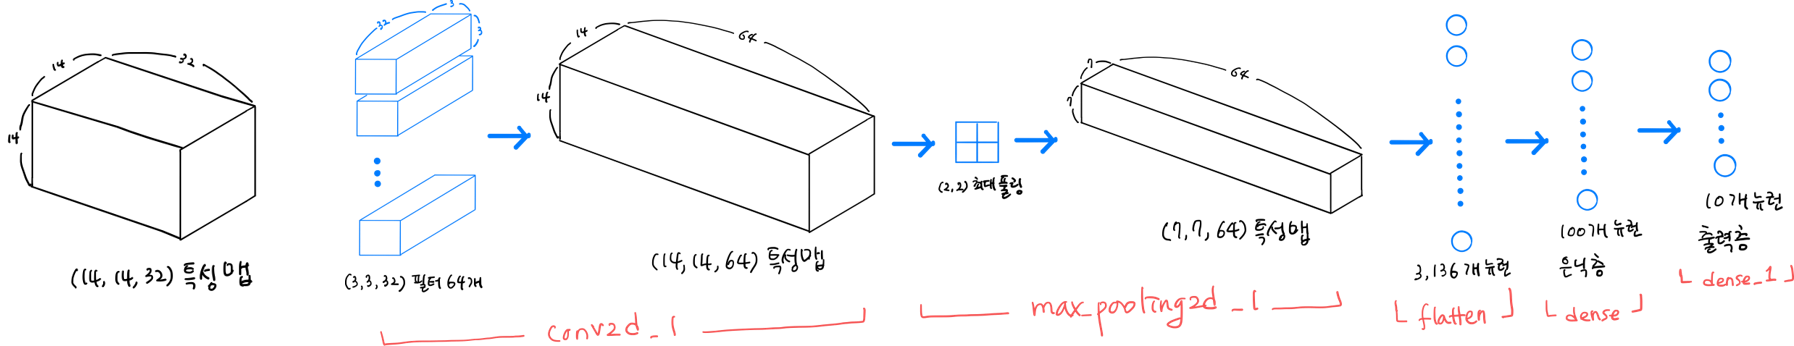

In [94]:
# 3차원 특성 맵을 일렬로 펼칠 차례
# -> 마지막에 10개의 뉴런을 가진 밀집 층에서 확률을 계산
# 이번에는 특성맵을 일렬로 펼쳐서 바로 출력층에 전달하지 않고
# 중간에 하나의 밀집 은닉층을 하나 추가함
# Flatten -> Dense 은닉층 -> Dropout -> Dense 출력층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
# 은닉층은 100개의 뉴런을 사용하고 활성화 함수는 합성곱과 같은 렐루 사용
model.add(keras.layers.Dropout(0.4))
# 드롭아웃을 이용해 은닉층의 과대 적합을 막아 성능을 조금 개선
model.add(keras.layers.Dense(10,activation='softmax'))
# 패션 MNIST는 클래스를 10개로 분류하는 다중분류 문제임으로 활성화함수는 소프트맥스 사용
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# 합성곱 층과 풀링층의 효과를 확인 할 수 있다.
# 첫번째 합성곱층을 통과하면서 특성맵의 깊이가 32가 됨
# 두번째 합성곱층을 통과하면서 특성맵의 크기가 64로 늘어남
# 반면 특성 맵의 가로세로 크기는 첫번째 풀링 층에서 절반으로 줄어들고
# 두번째 풀링에서 다시 절반으로 줄어듬 따라서 최종 특성맵의 크기는 (7,7,64)임

# 완전 신경망에서 했던것 처럼 모델 파라미터 개수는 첫번째 합성곱층은 32개의 필터를 가지고 있고 크기가 (3,3,)깊이가 1이고 필터마다 1의 절편이 있음
# 3 * 3 * 1 * 32 + 32 = 320의 파라미터

# 두번째 합성곱 층은 64개의 필터를 사용하게 크기가 (3,3,) 깊이가 32이고 필터마다 1의 절편이 있음
# 3 * 3 * 32 * 64 +64 = 18496의 파라미터

# Flaten클래스의 (7,7,64) 크기의 특성맵을 1차원 배열로 펼치면
# (3136,)의 크기의 배열이 됨 이를 100개의 뉴런과 완전히 연결해야함으로
# 은닉층의 모델 파라미터 개수 -> 3136*100+100 = 313700의 파라미터

# 마지막 출력층의 모델 파라미터 개수는 1010개

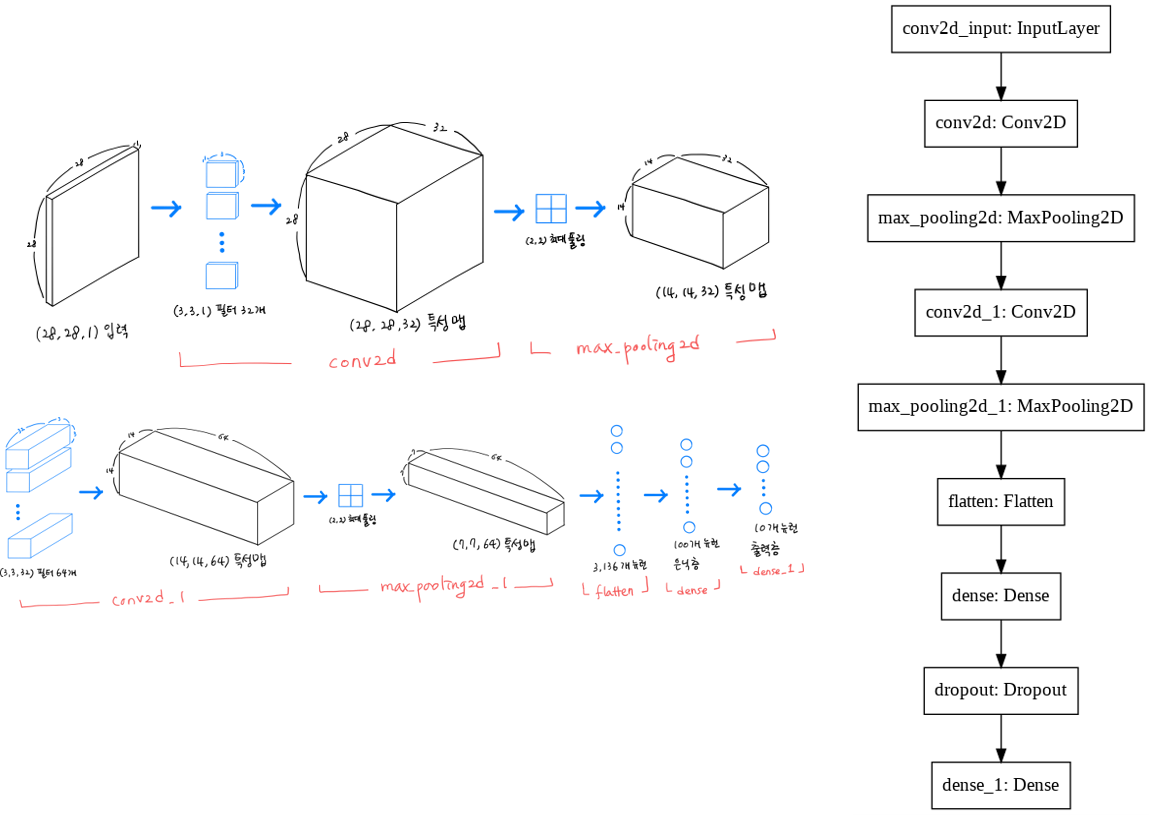

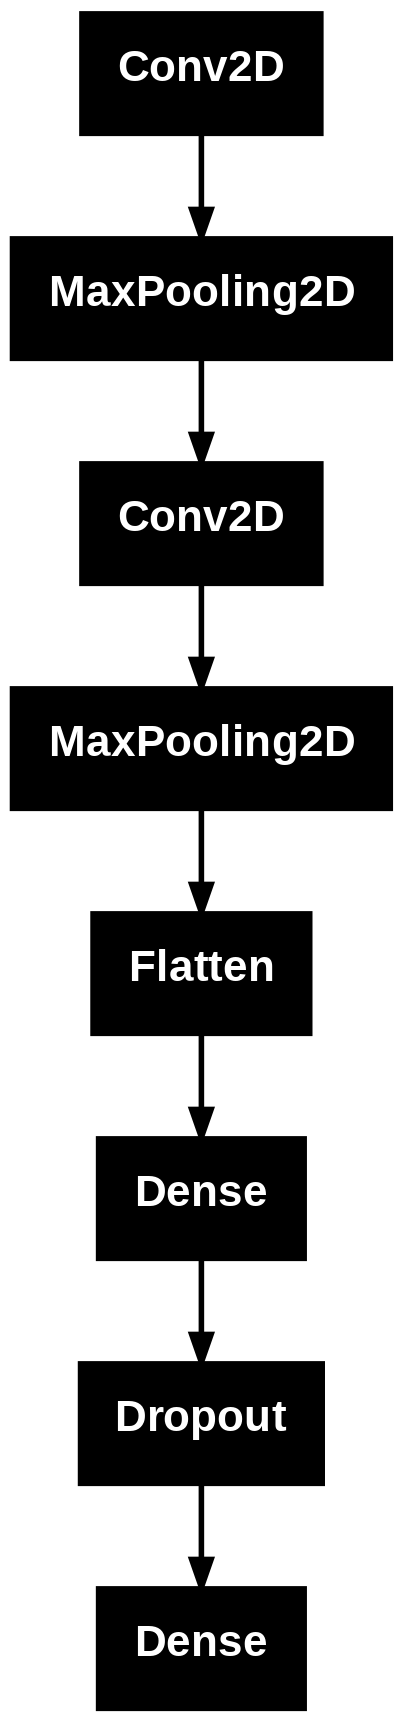

In [96]:
# 케라스는 층의 구성을 그림으로 보여주는 메서드가 있다.  (keras.utils.plot_model)
keras.utils.plot_model(model) # 버전차이

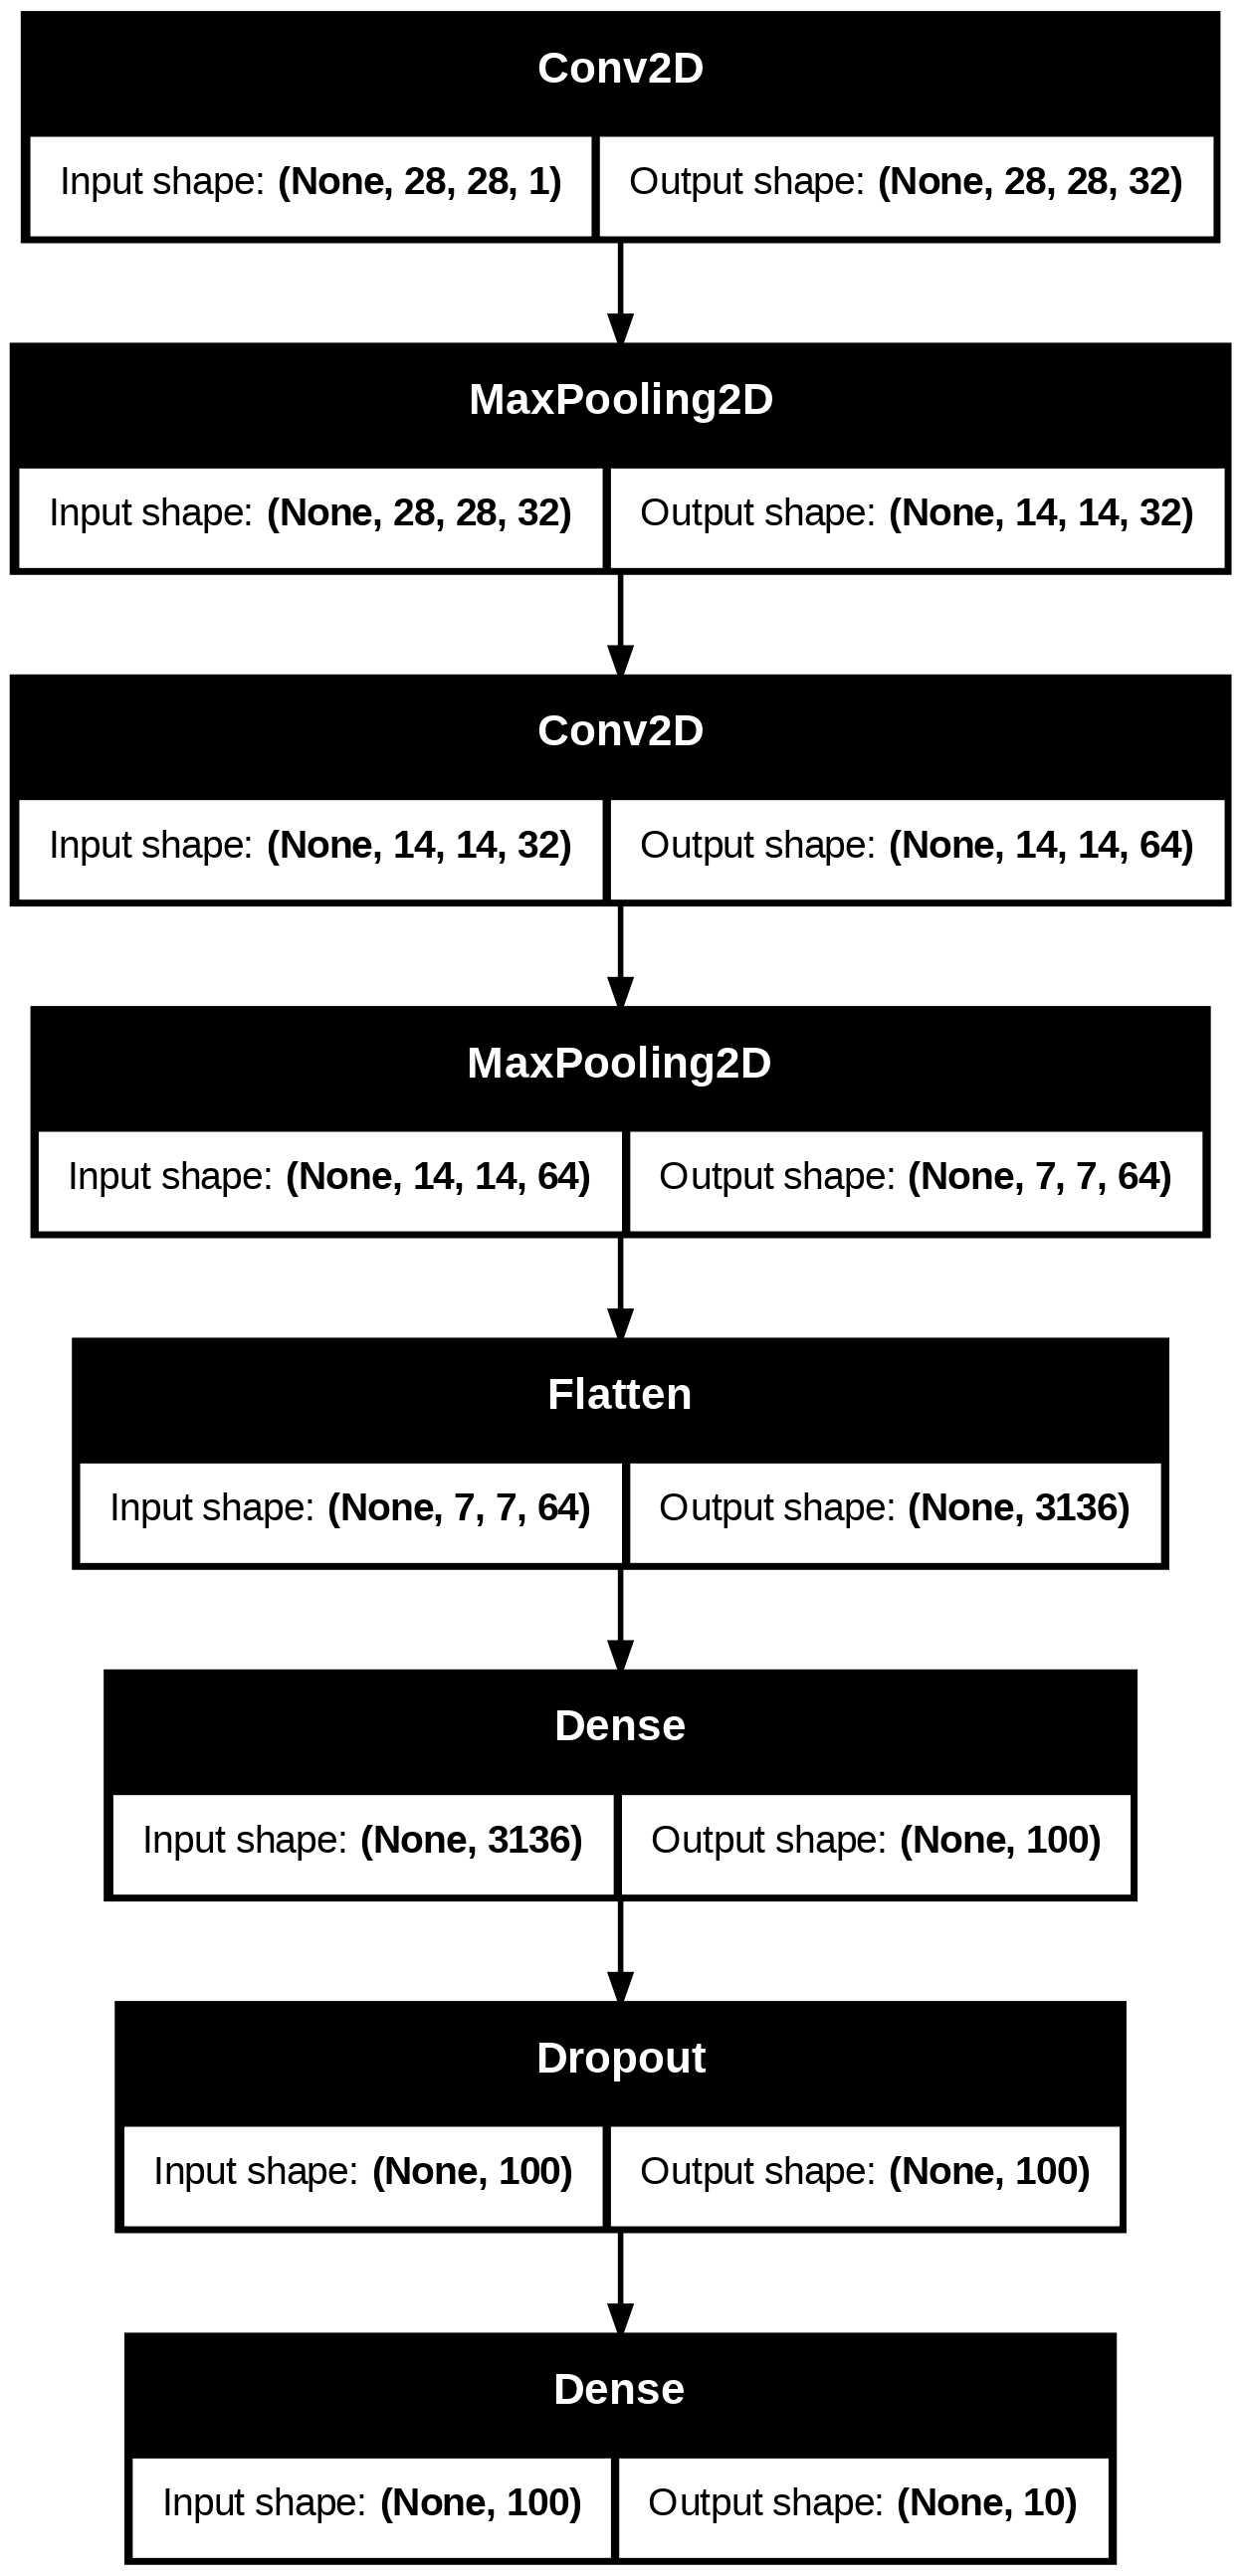

In [97]:
keras.utils.plot_model(model, show_shapes=True) # 입력과 출력 크기를 표시

In [98]:
# 패션 MNIST 데이터에 적용할 합성곱 신경망 모델의 구성 끝 -> 컴파일하고 훈련 진행 시작!

# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 아담 최적화로 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
# ModelCheckpoint 콜백 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
# EarlyStopping 콜백 조기 종료
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 114s 74ms/step - accuracy: 0.7402 - loss: 0.7244 - val_accuracy: 0.8758 - val_loss: 0.3355
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 127s 65ms/step - accuracy: 0.8686 - loss: 0.3654 - val_accuracy: 0.8973 - val_loss: 0.2804
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.8869 - loss: 0.3074 - val_accuracy: 0.9013 - val_loss: 0.2652
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 123s 52ms/step - accuracy: 0.8976 - loss: 0.2735 - val_accuracy: 0.9121 - val_loss: 0.2423
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 61ms/step - accuracy: 0.9076 - loss: 0.2520 - val_accuracy: 0.9141 - val_loss: 0.2350
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 124s 49ms/step - accuracy: 0.9147 - loss: 0.2282 - val_accuracy: 0.9177 - val_loss: 0.2350
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9208 - loss: 0.2094 - val_accuracy: 0.9147 - val_loss: 0.2510


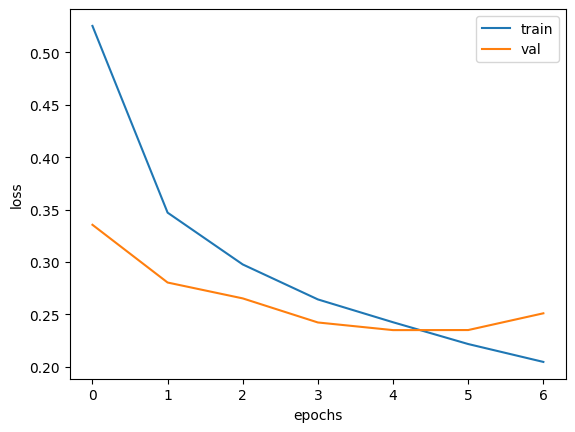

In [99]:
# 훈련세트 성능이 92.08% 까지 나옴
# 손실 그래프를 그려서 조기 종료가 잘 이루어 졌는지 확인해보자
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 검증세트에 대한 손실이 점파 감소하다 정체되기 시작하고
# 훈련세트에 대한 손실은 점점 낮아짐
# 이 그래프를 기반으로 6번째 에포크를 최적으로 생각할 수 있음
# 결과는 사람마다 다름

In [100]:
# EarlyStopping 클래스에서 restore_best_weights=True로 지정해서 현재 model 객체가 최적의 모델 파라미터로 복원됨
# ModelCheckpoint 콜백이 저장한 best-cnn-model.keras 파일을 다시 읽을 필요가 없음

# 이번 세트에 대한 성능 평가 진행
model.evaluate(val_scaled, val_target)
# 이 결과는 fit() 메서드의 출력 중 다섯번째 출력과 비슷함
# EarlyStopping 콜백이 model 객체의 최상의 모델 파라미터로 잘 복원 함

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9171 - loss: 0.2259


[0.23498238623142242, 0.9140833616256714]

In [101]:
# 맨 처음 떼어 놓았던 테스트 세트로 합성곱 신경망의 일반화 성능을 파악해보자
val_scaled = val_scaled.reshape(-1,28,28,1)/255.0
# 훈련세트와 검증세트에서 했던 것 처럼 픽셀 값의 범위를
# 0~1 사이로 바꾸고 이미지 크기를 (25,25,1)로 변경

In [102]:
model.evaluate(test_input,test_target)
# 테스트 세트에서 점수는 검증 세트보다 조금 작음
# 이 모델을 실전에 투입하면 90% 이상의 성능을 기대할 수 있다

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8881 - loss: 37.3710


[35.77455139160156, 0.888700008392334]

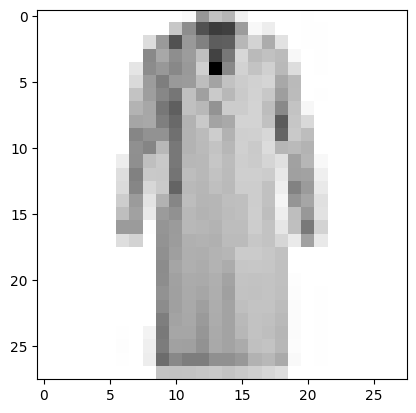

In [108]:
# 편의상 검증 세트의 열세번째 샘플인 이미지를 활용해보자
# 맷플롯립에서 흑백 이미지에 깊이 차원은 없다 -> (28,28,1)크기를 (28,28)로 변경 reshape()
plt.imshow(val_scaled[12].reshape(28,28),cmap='gray_r')
# 열세번째 샘플인 val_scaled[5]
plt.show()

In [104]:
preds = model.predict(val_scaled[12:13])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.07748887 0.00368225 0.00786473 0.02521308 0.00151493 0.39477065
  0.01146735 0.22410281 0.16980986 0.08408549]]


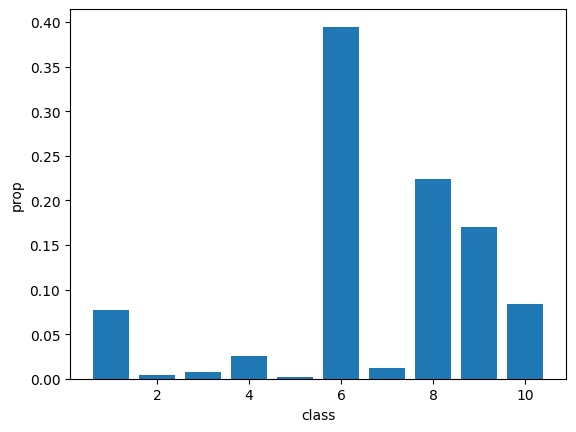

In [107]:
# 막대그래프로 표시
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prop')
plt.show()

In [106]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','백','엉클부츠']

import numpy as np
print(classes[np.argmax(preds)])

샌들


Conv2D, maxpooling, keras.utils.plot_model, padding,